# CoreMS Assignments to APTIM

`CoreMS` framework for mass spectrum


### 1. Import Data File


In [1]:
from pathlib import Path

data_dir = Path.cwd() / "data" / "user_data"
print(data_dir)

/home/corems/data/user_data


In [2]:
filepaths = list(data_dir.iterdir())
for idx, filepath in enumerate(filepaths):
    print(f"{idx}: {filepath}")

0: /home/corems/data/user_data/1p5_NegESI_SRFA_AfterSW28_sum50_ABS_3sigma.pks
1: /home/corems/data/user_data/2020September23NegESI_PFAS_AFFF_1_10000_sum250_Rephased.pks
2: /home/corems/data/user_data/2020September23PosESI_PFAS_AFFF_1_10000_sum250_Rephased.pks
3: /home/corems/data/user_data/2021May20_SRFA_Sum568_6p3s_1E6_3sigma_101221.pks
4: /home/corems/data/user_data/2023July28_NegESI_Guardian_AFFFC_wSRFA_4s_3E6_sum150_3sigma.pks
5: /home/corems/data/user_data/2023July28_NegESI_Guardian_AFFFC_wSRFA_4s_8E5_sum150_3sigma.pks
6: /home/corems/data/user_data/2023July28_NegESI_Jacobs3M_AFFF_wSRFA_4s_8E5_sum100_3sigma.pks
7: /home/corems/data/user_data/2023July28_NegESI_PetersonBucket_AFFF_wSRFA_4s_3E6_sum100_3sigma.pks
8: /home/corems/data/user_data/2024March21_NegESI_Angus_Alcoseal_106004E_sum250_3sigma.pks
9: /home/corems/data/user_data/2024March21_NegESI_Angus_Alcoseal_1060_24_sum250_3sigma.pks
10: /home/corems/data/user_data/2024March21_NegESI_Angus_Alcoseal_1061_01_02_sum250_3sigma.pks

### 2. Import Centroid Mass List Files

See [MS_file_imports.md](/home/corems/docs/user_guide/MS_file_imports.md) for details on the class methods, parameters and settings used for mass list file imports.

#### .pks Files

`.pks` files are .txt files exported from Predator Analysis software in a custom format. When the .pks file extension is detected, this format is used for importing the mass spectral data with user-specified `MassSpectrumSetting`s.

In the following example, the noise threshold method is `"signal_noise"`, and the minimum is set to `6` (default=6). The m/z range is also set explicitly.

Filtering based on noise threshold and mz range occur when `auto_process=True`. Settings are read from a JSON or other file when `loadSettings=True`. Currently, this feature is not fully implemented.

The total number of peaks (92,307) is illustrated with `len(mass_spectrum)`.

In [7]:
# Imports
from corems.encapsulation.factory.parameters import MSParameters
from corems.mass_spectrum.input.massList import ReadMassList

# Choose noise threshold method and minimum value
MSParameters.mass_spectrum.noise_threshold_method = "signal_noise"
MSParameters.mass_spectrum.noise_threshold_min_s2n = 0

# Set m/z range for peak picking and noise threshold
MSParameters.mass_spectrum.noise_min_mz = 50.0
MSParameters.mass_spectrum.noise_max_mz = 1500.0
MSParameters.mass_spectrum.min_picking_mz = 50.0
MSParameters.mass_spectrum.max_picking_mz = 1500.0

# Set Kendrick base
kb = {"C": 2, "H": 4, "O": 1}
MSParameters.ms_peak.kendrick_base = kb

# Specify file path
file_location = filepaths[1]
print(f"file locations: {file_location}")

file locations: /home/corems/data/user_data/2020September23NegESI_PFAS_AFFF_1_10000_sum250_Rephased.pks


9246


<Axes: xlabel='$\t{m/z}$', ylabel='Abundance'>

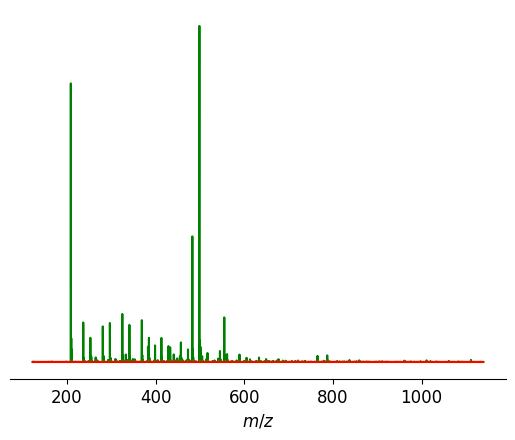

In [8]:
mass_list_reader = ReadMassList(file_location)

# Import centroided spectrum
mass_spectrum = mass_list_reader.get_mass_spectrum(
    polarity=-1, auto_process=True, loadSettings=False
)
print(len(mass_spectrum))

# Plot the mass spectrum
mass_spectrum.plot_profile_and_noise_threshold()

### 3. Access mass spectrum peak objects


In [9]:
n = 20
most_abundant_peaks = mass_spectrum.sort_by_abundance(reverse=True)[:n]

print(f"Most abundant peaks (top {n}):")
for i, mspeak in enumerate(most_abundant_peaks):
    print(
        f"{i+1}: {mspeak.mz_exp:.7f} m/z | "
        f"{mspeak.abundance:.4f} abundance | " 
        f"{mspeak.resolving_power:.1f} resolving power | " 
        f"{mspeak.signal_to_noise:.1f} S/N | "
        f"{mspeak.kmd:.4f} KMD" 
    )

Most abundant peaks (top 20):
1: 498.9302200 m/z | 101.7471 abundance | 1635672.0 resolving power | 7167.8 S/N | -0.6331 KMD
2: 209.0853000 m/z | 84.3319 abundance | 3010102.0 resolving power | 14118.4 S/N | -0.9608 KMD
3: 483.0417500 m/z | 38.0031 abundance | 1507843.0 resolving power | 2774.8 S/N | -0.7541 KMD
4: 325.1690300 m/z | 14.5205 abundance | 2028731.0 resolving power | 5460.0 S/N | -0.9754 KMD
5: 555.0628200 m/z | 13.4742 abundance | 1046348.0 resolving power | 5047.8 S/N | -0.7323 KMD
6: 369.1952400 m/z | 12.6385 abundance | 1690971.0 resolving power | 4913.2 S/N | -0.9754 KMD
7: 237.1166000 m/z | 11.9353 abundance | 2803576.0 resolving power | 1998.1 S/N | -0.9754 KMD
8: 297.1377300 m/z | 11.7846 abundance | 2274190.0 resolving power | 4431.2 S/N | -0.9608 KMD
9: 341.1639500 m/z | 11.2147 abundance | 1846214.0 resolving power | 4359.7 S/N | -0.9608 KMD
10: 281.1428300 m/z | 10.7652 abundance | 2335183.0 resolving power | 5651.6 S/N | -0.9754 KMD
11: 253.1115200 m/z | 7.302

In [10]:
print(f"Kendrick base: {mass_spectrum.mspeaks_settings.kendrick_base}")


Kendrick base: {'C': 2, 'H': 4, 'O': 1}


### 4. Molecular formula search
The formula database isn't built until the `SearchMolecularFormulas` method is run.

See [database_initialization.md](/home/corems/docs/user_guide/database_initialization.md) and [molecular_formula_search.md](/home/corems/docs/user_guide/molecular_formula_search.md) for details about the molecular formula database and search process. Both database initialization and molecular formula searching rely establishing the relevant heteroatom space.

Numerous parameters can be set to facilitate the molecular search process, including element number and element ratio constraints, and ppm and isotope abundance error constraints. Many of these constraints are illustrated below. In the following example, `first_hit = False`, meaning that peaks aren't skipped when a molecular formula has already been assigned.

In [11]:
from corems.molecular_id.search.molecularFormulaSearch import SearchMolecularFormulas

# Ion Types
mass_spectrum.molecular_search_settings.isProtonated = True
mass_spectrum.molecular_search_settings.isRadical = False
mass_spectrum.molecular_search_settings.isAdduct = False

# Atom constraints
mass_spectrum.molecular_search_settings.usedAtoms["C"] = (1, 100)
mass_spectrum.molecular_search_settings.usedAtoms["H"] = (4, 200)   # Max H for C100 is 202
mass_spectrum.molecular_search_settings.usedAtoms["N"] = (0, 4)
mass_spectrum.molecular_search_settings.usedAtoms["O"] = (1, 30)
# mass_spectrum.molecular_search_settings.usedAtoms["P"] = (0, 1)
mass_spectrum.molecular_search_settings.usedAtoms["S"] = (0, 2)

# Mass error constraints
mass_spectrum.molecular_search_settings.error_method = "None"
mass_spectrum.molecular_search_settings.min_ppm_error = -0.2   # Bahureksa paper 0.4
mass_spectrum.molecular_search_settings.max_ppm_error = 0.2

# DBE constraints - Can always throw out high Mod AI (> 0.5 = aromatic and > 0.67 = condensed aromatic)
mass_spectrum.molecular_search_settings.min_dbe = 0
mass_spectrum.molecular_search_settings.max_dbe = 66   # Max DBE 66 for C100 (empirical Max DBE = 2C/3)

# H/C ratio constraints (Kind & Fiehn)
mass_spectrum.molecular_search_settings.min_hc_filter = 0.2
mass_spectrum.molecular_search_settings.max_hc_filter = 3.1

# O/C ratio constraints (Kind & Fiehn)
mass_spectrum.molecular_search_settings.min_oc_filter = 0
mass_spectrum.molecular_search_settings.max_oc_filter = 1.2

# O/P ratio constraints
# mass_spectrum.molecular_search_settings.min_op_filter = 2

# Isotope abundance constraints
mass_spectrum.molecular_search_settings.min_abun_error = -15
mass_spectrum.molecular_search_settings.max_abun_error = 15


SearchMolecularFormulas(mass_spectrum, first_hit=True).run_worker_mass_spectrum()
mass_spectrum.percentile_assigned(report_error=True)


'runworker'  481.41 ms


Loading molecular formula database: 563414it [00:41, 13717.28it/s]
Started molecular formula search for class {"N": 3, "S": 2, "O": 10}, (de)protonated : 100%|██████████| 300/300 [00:22<00:00, 13.23it/s]
Loading molecular formula database: 246118it [00:23, 10602.03it/s]
Started molecular formula search for class {"N": 4, "S": 2, "O": 30}, (de)protonated : 100%|██████████| 150/150 [00:08<00:00, 16.97it/s]


'run_molecular_formula'  97372.99 ms
3189 assigned peaks and 6057 unassigned peaks, total  = 34.49 %, relative abundance = 46.36 %, RMS error (best candidate) (ppm) = 0.107


(3189, 6057, 34.49059052563271, 46.362670201360636, 0.10692948632788944)

### 5. Visualizing Results

The tools for exploring and visualizing molecular formula assignment results are primarily contained in `HeteroatomsClassification`, consistent with the use of heteroatom space to define search space.

<Axes: xlabel='$\t{m/z}$', ylabel='Abundance'>

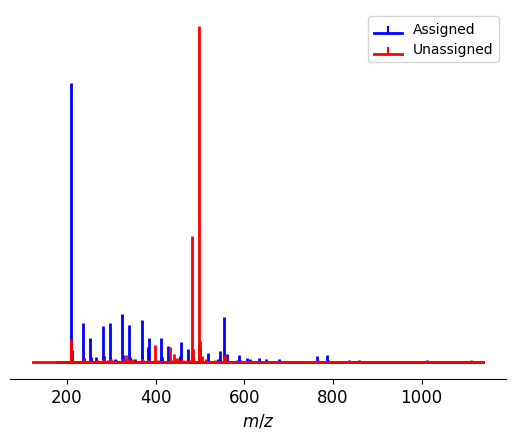

In [12]:
from corems.molecular_id.factory.classification import HeteroatomsClassification

mass_spectrum_by_classes = HeteroatomsClassification(
    mass_spectrum, choose_molecular_formula=True
)
mass_spectrum_by_classes.plot_ms_assigned_unassigned()

### 6. Exploring Mass Spectrum

In [13]:
for mspeaks in mass_spectrum.sort_by_abundance(reverse=True)[:20]:
    for mf in mspeaks:
        print(f"Abundance: {mspeaks.abundance:.2f} | "
                f"Exp m/z: {mspeaks.mz_exp:.7f} | "
              f"calc m/z: {mf.mz_calc:.6f} | "
              f"Error: {mf.mz_error:.6f} | "
              f"DBE: {mf.dbe} | "
              f"H/C: {mf.H_C:.6f} | "
              f"O/C: {mf.O_C:.6f} | "
              f"AI mod: {mf.A_I_mod:.6f} | "
              f"KMD: {mf.kmd:.4f} | "
              f"Class: {mf.class_label} | "
              f"Formula: {mf.string_formated}")

Abundance: 84.33 | Exp m/z: 209.0853000 | calc m/z: 209.085304 | Error: -0.018081 | DBE: 0.0 | H/C: 2.250000 | O/C: 0.500000 | AI mod: 0.000000 | KMD: -0.9608 | Class: S1 O4 | Formula: C₈H₁₈O₄S₁
Abundance: 14.52 | Exp m/z: 325.1690300 | calc m/z: 325.169033 | Error: -0.010476 | DBE: 0.0 | H/C: 2.142857 | O/C: 0.428571 | AI mod: 0.000000 | KMD: -0.9754 | Class: S1 O6 | Formula: C₁₄H₃₀O₆S₁
Abundance: 13.47 | Exp m/z: 555.0628200 | calc m/z: 555.062773 | Error: 0.085171 | DBE: 13.0 | H/C: 0.909091 | O/C: 0.772727 | AI mod: 0.333333 | KMD: -0.7323 | Class: O17 | Formula: C₂₂H₂₀O₁₇
Abundance: 12.64 | Exp m/z: 369.1952400 | calc m/z: 369.195248 | Error: -0.022088 | DBE: 0.0 | H/C: 2.125000 | O/C: 0.437500 | AI mod: 0.000000 | KMD: -0.9754 | Class: S1 O7 | Formula: C₁₆H₃₄O₇S₁
Abundance: 11.94 | Exp m/z: 237.1166000 | calc m/z: 237.116604 | Error: -0.016487 | DBE: 0.0 | H/C: 2.200000 | O/C: 0.400000 | AI mod: 0.000000 | KMD: -0.9754 | Class: S1 O4 | Formula: C₁₀H₂₂O₄S₁
Abundance: 11.78 | Exp m

In [14]:
n = 20
most_abundant_peaks = mass_spectrum.sort_by_mz()[:n]

print(f"Most abundant peaks (top {n}):")
for i, mspeak in enumerate(most_abundant_peaks):
    print(
        f"{i+1}: {mspeak.mz_exp:.7f} m/z | "
        f"{mspeak.abundance:.4f} abundance | " 
        f"{mspeak.resolving_power:.1f} resolving power | " 
        f"{mspeak.signal_to_noise:.1f} S/N | "
        f"{mspeak.kmd:.4f} KMD" 
    )

Most abundant peaks (top 20):
1: 122.7817400 m/z | 0.0019 abundance | 3949046.0 resolving power | 19.7 S/N | -0.7086 KMD
2: 122.8829500 m/z | 0.0021 abundance | 2991995.0 resolving power | 21.6 S/N | -0.8098 KMD
3: 123.0651000 m/z | 0.0026 abundance | 4073405.0 resolving power | 27.4 S/N | -0.9918 KMD
4: 123.0654900 m/z | 0.0025 abundance | 2258561.0 resolving power | 25.6 S/N | -0.9922 KMD
5: 123.3121600 m/z | 0.0026 abundance | 4189144.0 resolving power | 27.3 S/N | -0.2387 KMD
6: 123.3123300 m/z | 0.0019 abundance | 6915271.0 resolving power | 19.5 S/N | -0.2389 KMD
7: 123.9641500 m/z | 0.0036 abundance | 3141161.0 resolving power | 36.8 S/N | -0.8903 KMD
8: 124.5474900 m/z | 0.0024 abundance | 3622259.0 resolving power | 24.3 S/N | -0.4733 KMD
9: 124.7325700 m/z | 0.0075 abundance | 2496605.0 resolving power | 77.5 S/N | -0.6583 KMD
10: 124.7326600 m/z | 0.0036 abundance | 2227772.0 resolving power | 37.6 S/N | -0.6584 KMD
11: 124.7328800 m/z | 0.0085 abundance | 1307417.0 resolvin

### 7. Exporting Molecular Formula Results

In [15]:
# exporting data
base_dir = Path("/home/corems/data")
exports_dir = base_dir / "exports"

# Create output paths for different formats
csv_file = exports_dir / "APTIM_neg_CoreMS.csv"

# Save in different formats
mass_spectrum.to_csv(str(csv_file))

# get pandas Dataframe
df = mass_spectrum.to_dataframe()
df.head()

,Index,m/z,Calibrated m/z,Calculated m/z,Peak Height,Peak Area,Resolving Power,S/N,Ion Charge,m/z Error (ppm),...,H,O,N,S,13C,15N,17O,18O,33S,34S
0,314,181.05400,181.05400,181.054004,0.0204,NaN,2172892.0,4.41,-1,-0.020168,...,14.0,4.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,340,191.07475,191.07475,191.074739,0.0127,NaN,1929904.0,2.10,-1,0.057064,...,16.0,3.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2,360,193.09039,193.09039,193.090389,0.0145,NaN,1760023.0,2.40,-1,0.004345,...,18.0,3.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,365,195.06965,195.06965,195.069654,0.0019,NaN,2536695.0,0.30,-1,-0.019050,...,16.0,4.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
4,366,195.13906,195.13906,195.139053,0.0059,NaN,1707576.0,0.96,-1,0.033661,...,20.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df.sort_values(by=["Peak Height"], ascending=False).head(10)

,Index,m/z,Calibrated m/z,Calculated m/z,Peak Height,Peak Area,Resolving Power,S/N,Ion Charge,m/z Error (ppm),...,H,O,N,S,13C,15N,17O,18O,33S,34S
6912,4381,498.93022,498.93022,NaN,101.7471,NaN,1635672.0,7167.78,-1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,495,209.08530,209.08530,209.085304,84.3319,NaN,3010102.0,14118.44,-1,-0.018081,...,18.0,4.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
6661,4072,483.04175,483.04175,NaN,38.0031,NaN,1507843.0,2774.81,-1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
230,2150,325.16903,325.16903,325.169033,14.5205,NaN,2028731.0,5460.00,-1,-0.010476,...,30.0,6.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
885,5238,555.06282,555.06282,555.062773,13.4742,NaN,1046348.0,5047.80,-1,0.085171,...,20.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
336,2655,369.19524,369.19524,369.195248,12.6385,NaN,1690971.0,4913.16,-1,-0.022088,...,34.0,7.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
52,882,237.11660,237.11660,237.116604,11.9353,NaN,2803576.0,1998.12,-1,-0.016487,...,22.0,4.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
164,1880,297.13773,297.13773,297.137733,11.7846,NaN,2274190.0,4431.21,-1,-0.011030,...,26.0,6.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
280,2393,341.16395,341.16395,341.163948,11.2147,NaN,1846214.0,4359.67,-1,0.005786,...,30.0,7.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
123,1669,281.14283,281.14283,281.142819,10.7652,NaN,2335183.0,5651.57,-1,0.040343,...,26.0,5.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df.sort_values(by=["m/z"], ascending=True).head(10)

,Index,m/z,Calibrated m/z,Calculated m/z,Peak Height,Peak Area,Resolving Power,S/N,Ion Charge,m/z Error (ppm),...,H,O,N,S,13C,15N,17O,18O,33S,34S
3215,0,122.78174,122.78174,NaN,0.0019,NaN,3949046.0,19.73,-1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3216,1,122.88295,122.88295,NaN,0.0021,NaN,2991995.0,21.55,-1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3217,2,123.06510,123.06510,NaN,0.0026,NaN,4073405.0,27.36,-1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3218,3,123.06549,123.06549,NaN,0.0025,NaN,2258561.0,25.61,-1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3219,4,123.31216,123.31216,NaN,0.0026,NaN,4189144.0,27.34,-1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3220,5,123.31233,123.31233,NaN,0.0019,NaN,6915271.0,19.48,-1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3221,6,123.96415,123.96415,NaN,0.0036,NaN,3141161.0,36.75,-1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3222,7,124.54749,124.54749,NaN,0.0024,NaN,3622259.0,24.33,-1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3223,8,124.73257,124.73257,NaN,0.0075,NaN,2496605.0,77.52,-1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3224,9,124.73266,124.73266,NaN,0.0036,NaN,2227772.0,37.56,-1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


`mass_spectrum.to_csv` and `mass_spectrum.to_dataframe` produce tables with the following columns.

In [18]:
for col in df.columns:
    print(col)

Index
m/z
Calibrated m/z
Calculated m/z
Peak Height
Peak Area
Resolving Power
S/N
Ion Charge
m/z Error (ppm)
m/z Error Score
Isotopologue Similarity
Confidence Score
DBE
O/C
H/C
Heteroatom Class
Ion Type
Adduct
Is Isotopologue
Mono Isotopic Index
Molecular Formula
KMD
Formula KMD
C
H
O
N
S
13C
15N
17O
18O
33S
34S


In [19]:
from corems.mass_spectrum.output.export import HighResMassSpecExport

# Create an export instance
# You need to provide an output file path (even though we're just getting a DataFrame)
# Create output paths for different formats
csv_file = exports_dir / "APTIM_neg_CoreMS_plus.csv"

exporter = HighResMassSpecExport(csv_file, mass_spectrum, output_type="pandas")

# If you want additional columns (like Aromaticity Index)
df_with_extras = exporter.get_pandas_df(additional_columns=["Aromaticity Index"])

In [20]:
df_with_extras.head()

,Index,m/z,Calibrated m/z,Calculated m/z,Peak Height,Peak Area,Resolving Power,S/N,Ion Charge,m/z Error (ppm),...,H,O,N,S,13C,15N,17O,18O,33S,34S
0,314,181.05400,181.05400,181.054004,0.0204,NaN,2172892.0,4.41,-1,-0.020168,...,14.0,4.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,340,191.07475,191.07475,191.074739,0.0127,NaN,1929904.0,2.10,-1,0.057064,...,16.0,3.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2,360,193.09039,193.09039,193.090389,0.0145,NaN,1760023.0,2.40,-1,0.004345,...,18.0,3.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,365,195.06965,195.06965,195.069654,0.0019,NaN,2536695.0,0.30,-1,-0.019050,...,16.0,4.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
4,366,195.13906,195.13906,195.139053,0.0059,NaN,1707576.0,0.96,-1,0.033661,...,20.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
for col in df_with_extras.columns:
    print(col)

Index
m/z
Calibrated m/z
Calculated m/z
Peak Height
Peak Area
Resolving Power
S/N
Ion Charge
m/z Error (ppm)
m/z Error Score
Isotopologue Similarity
Confidence Score
DBE
O/C
H/C
Heteroatom Class
Ion Type
Adduct
Is Isotopologue
Mono Isotopic Index
Molecular Formula
KMD
Formula KMD
Aromaticity Index
C
H
O
N
S
13C
15N
17O
18O
33S
34S
